**There are three methods to impute in categorical data**
1. Impute with most frequent
2. Create a another category example "Missing"
3. Random

# I. Most Frequent

**Assumtions while selecting this method**

- MCAR
- The mode of that category should be very high compare to others.
- Percentage of missing data less than 5 %

**Benefits**
- Very easy to implement.

**Disadvantages**
- Changes the distribution of the variable.


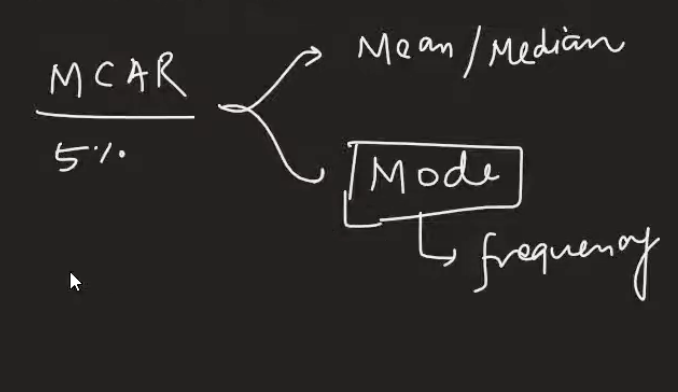


# II. MISSING CATEGORY IMPUTATION

**When to use**
- Missing data is more than 10 percentage.

# A. Most Frequent

### 1. How to impute using Pandas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv('train.csv', usecols = ['GarageQual', 'FireplaceQu', 'SalePrice'])
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [8]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [6]:
df['FireplaceQu'].value_counts()

FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64

## GarageQual Column

Text(0, 0.5, 'Number of Houses')

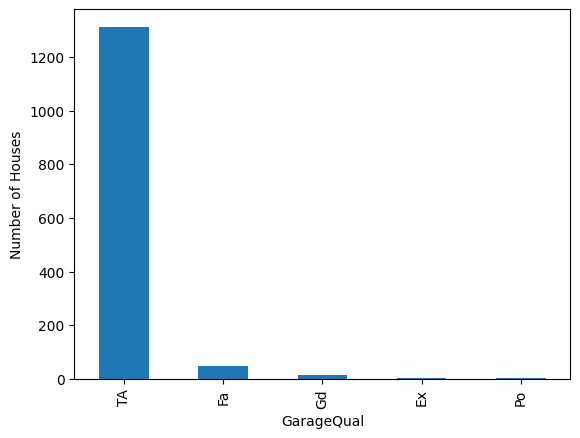

In [10]:
df['GarageQual'].value_counts().sort_values(ascending = False).plot(kind = 'bar')
plt.xlabel('GarageQual')
plt.ylabel('Number of Houses')

In [11]:
df['GarageQual'].mode()

0    TA
Name: GarageQual, dtype: object

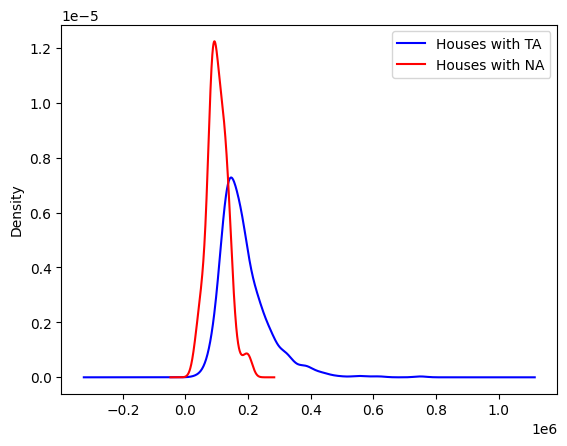

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['GarageQual'] == 'TA']['SalePrice'].plot(kind = 'kde', ax = ax, color = 'blue')
df[df['GarageQual'].isnull()]['SalePrice'].plot(kind = 'kde', ax = ax, color = 'red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with TA', 'Houses with NA']
ax.legend(lines, labels, loc = 'best')

In [13]:
temp = df[df['GarageQual'] == 'TA']['SalePrice']

In [14]:
df['GarageQual'].fillna('TA', inplace = True)

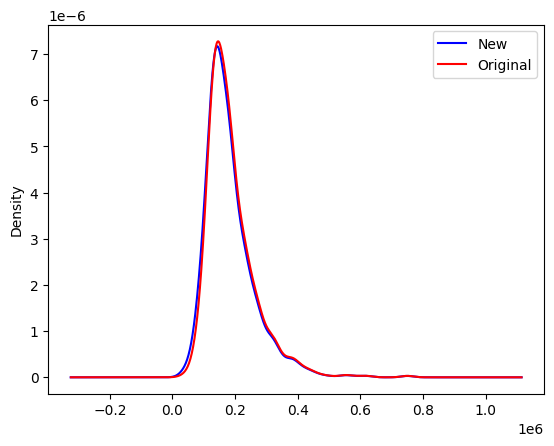

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['GarageQual'] == 'TA']['SalePrice'].plot(kind = 'kde', ax = ax, color = 'blue')
temp.plot(kind = 'kde', ax = ax, color = 'red')

lines, labels = ax.get_legend_handles_labels()
labels = ['New', 'Original']
ax.legend(lines, labels, loc = 'best')

If we see above the distribution between both new and original is almost same. The reason is because percentage of missing data is very less.

## FireplaceQu

If we see below, that its failing the first criteria of imputing mode value as its important that the mode value should dominate with other categories. Gd and TA categories are of comparable frequency.

Text(0, 0.5, 'Number of House')

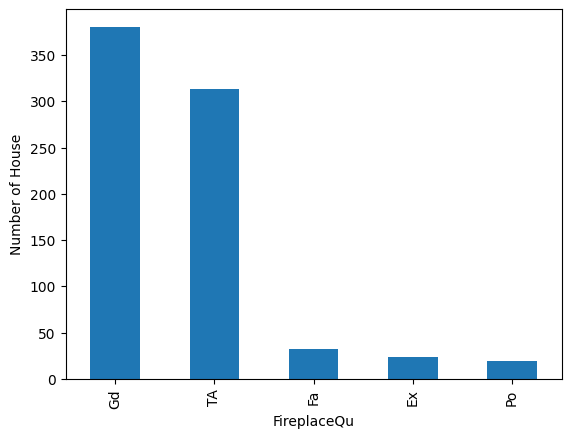

In [21]:
df['FireplaceQu'].value_counts().sort_values(ascending = False).plot(kind = 'bar')
plt.xlabel('FireplaceQu')
plt.ylabel('Number of House')

In [24]:
df['FireplaceQu'].mode()

0    Gd
Name: FireplaceQu, dtype: object

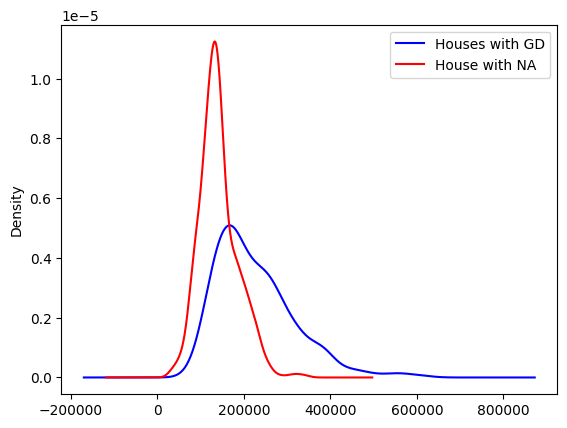

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['FireplaceQu'] == 'Gd']['SalePrice'].plot(kind = 'kde', color = 'blue', ax = ax)
df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind = 'kde', color = 'red', ax = ax)

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with GD', 'House with NA']
ax.legend(lines, labels, loc = 'best')

In [27]:
temp1 = df[df['FireplaceQu'] == 'Gd']['SalePrice']
df['FireplaceQu'].fillna('Gd', inplace = True)

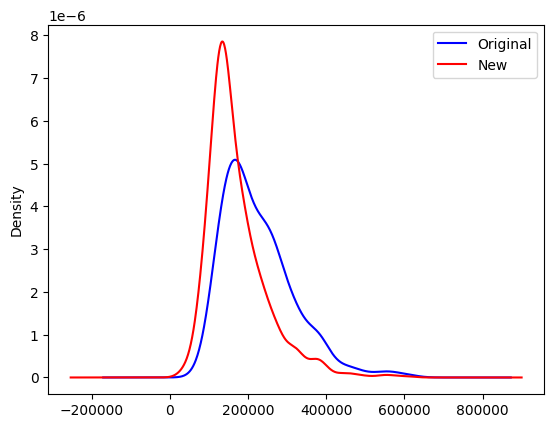

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111)

temp1.plot(kind = 'kde', color = 'blue', ax = ax)
df[df['FireplaceQu'] == 'Gd']['SalePrice'].plot(kind = 'kde', color = 'red', ax = ax)

lines, labels = ax.get_legend_handles_labels()
labels = ['Original', 'New']
ax.legend(lines, labels, loc = 'best')

### 2. How to impute using Sklearn

In [33]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,Gd,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [30]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('SalePrice', axis = 1),
                                                   df['SalePrice'],
                                                   test_size = 0.2,
                                                   random_state = 1)

In [35]:
trf = ColumnTransformer([
    ('mode', SimpleImputer(strategy = 'most_frequent'), ['FireplaceQu','GarageQual'])
], remainder = 'passthrough')

In [36]:
X_train1 = trf.fit_transform(X_train)
X_test1 = trf.transform(X_test)

In [37]:
trf.named_transformers_['mode'].statistics_

array(['Gd', 'TA'], dtype=object)